In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


from sklearn.metrics import accuracy_score




In [2]:
Churn_datasets = pd.read_csv('Churn_Modelling.csv')
Churn_datasets.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7052,7053,15681755,Dennys,605,France,Female,32,5,0.00,2,1,1,42135.28,0
6240,6241,15626507,Chukwubuikem,558,France,Male,27,1,152283.39,1,1,0,183271.15,0
6141,6142,15809302,Wright,572,France,Male,24,1,0.00,2,1,1,151460.84,0
7456,7457,15598614,Lucchesi,790,Spain,Male,20,8,0.00,2,1,0,168152.76,0
2767,2768,15747265,Huang,598,Germany,Female,27,10,171283.91,1,1,1,84136.12,0


In [3]:
Churn_datasets.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
Churn_datasets.shape

(10000, 14)

In [5]:
Churn_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
Churn_datasets.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
Churn_datasets.duplicated().sum()

0

In [8]:
Churn_datasets['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
Churn_datasets['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
Churn_datasets['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
Churn_datasets = Churn_datasets.drop(columns =['RowNumber','CustomerId','Surname'],axis=1)
# Churn_datasets.head()

In [12]:
Churn_datasets.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
Churn_datasets =pd.get_dummies(Churn_datasets,columns = ['Geography','Gender'],drop_first =True)

In [14]:
Churn_datasets.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
Churn_datasets['Geography_Spain']

0       False
1        True
2       False
3       False
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Geography_Spain, Length: 10000, dtype: bool

In [16]:
Churn_datasets['Geography_Germany'] = Churn_datasets['Geography_Germany'].replace({'False':0,'True':1})
# new_string = original_string.replace("World", "Python")
# Churn_datasets['Geography_Germany'] = Churn_datasets['Geography'].replace({'Germany': 1, 'France': 0, 'Spain': 0})
Churn_datasets['Geography_Germany'] = Churn_datasets['Geography_Germany'].astype(int)

In [17]:
Churn_datasets['Geography_Spain'] = Churn_datasets['Geography_Spain'].replace({'False':0,'True':1})
# new_string = original_string.replace("World", "Python")
Churn_datasets['Geography_Spain'] = Churn_datasets['Geography_Spain'].astype(int)

In [18]:
Churn_datasets['Gender_Male'] = Churn_datasets['Gender_Male'].replace({'False':0,'True':1})
Churn_datasets['Gender_Male'] = Churn_datasets['Gender_Male'].astype(int)

In [19]:
Churn_datasets.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
x = Churn_datasets.drop(columns=['Exited'])
y = Churn_datasets['Exited']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [22]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [23]:
x_train_scaler

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [24]:
x_test_scaler

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [38]:
# now using the Sequential model uisng the keras lib 
model = Sequential()
# here we creating the nn with diff layer
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<br>
The model.summary() function in Keras is used to print a summary of the neural network model.
This summary provides an overview of the model's architecture, including the number of layers,
the types of layers, the shapes of the layers, and the number of parameters in each layer.
Here's what the code does and what you can expect from its output:

In [39]:
model.summary()
# here model summary

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

<br>
NN train here

In [47]:
history = model.fit(x_train_scaler,y_train,epochs=100,validation_split=0.2)
# here this stage which our nn train loops work tell the 10 times in the data 
# here in this loops is increase it decress the loss

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3247 - val_accuracy: 0.8619 - val_loss: 0.3390
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3110 - val_accuracy: 0.8619 - val_loss: 0.3369
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8631 - loss: 0.3298 - val_accuracy: 0.8594 - val_loss: 0.3412
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3189 - val_accuracy: 0.8575 - val_loss: 0.3414
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3273 - val_accuracy: 0.8562 - val_loss: 0.3360
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8638 - loss: 0.3263 - val_accuracy: 0.8619 - val_loss: 0.3371
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8682 - loss: 0.3199 - val_accuracy: 0.8631 - val_loss: 0.3386
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8733 - loss: 0.3116 - val_accu

In [42]:
# here due to training it cal the weight and bias 
model.layers[0].get_weights() # -----------------> it for the fist layer 
# here we show the all weight and bias as shown 

[array([[-0.13928531, -0.04152028, -0.0679704 ,  0.08249132,  0.18928006,
          0.19833128, -0.14463253,  0.15722346,  0.21249881,  0.21659996,
          0.1796571 ],
        [ 0.08460809,  1.4852109 ,  0.38720158,  0.5217939 , -0.1283739 ,
          0.24725802, -0.24024953,  0.84510994, -0.04086448,  0.03250202,
         -0.38493937],
        [-0.19367985, -0.05401793,  0.00488995,  0.04297484, -0.11284856,
          0.2805125 ,  0.30495483,  0.31994396, -0.26108897, -0.43995726,
          0.19391122],
        [ 0.82807827, -0.15624431, -0.24156043,  0.24685271, -0.04630245,
         -0.7144986 , -0.45953086, -0.6268348 , -0.71310765,  0.11796852,
          0.92461264],
        [-0.41011795,  0.3997808 , -1.3720517 ,  1.2211373 ,  0.1956695 ,
         -0.17783791, -0.31371778, -0.37680185, -0.22910851, -0.00554424,
         -0.14360991],
        [-0.04699277,  0.20643519,  0.05945774, -0.11357767,  0.32475865,
         -0.19103484,  0.21571065,  0.0514931 ,  0.15348221, -0.0071347

In [43]:
# here weight and bias for the second layer uisng 
model.layers[1].get_weights() # ------------------> for the second layer weight and bias

[array([[ 0.1159937 ,  0.5802548 , -0.09433144,  0.2752155 ,  0.697775  ,
          0.5303553 ,  0.4672478 ,  0.30406424, -0.0838518 , -0.24204896,
          0.38350672],
        [-0.0897608 , -0.48581403, -0.3118107 , -1.4512136 ,  0.08921658,
          0.0627633 ,  0.75685865,  0.4459617 ,  0.40569645, -0.03663217,
          0.7232335 ],
        [ 0.9773447 , -0.8272106 , -0.2615394 , -0.3280623 , -0.40241876,
         -0.08887386, -0.21208557, -0.10745984,  0.19235447, -0.7734321 ,
         -0.6543232 ],
        [ 1.0108881 , -0.14458407,  0.04491873,  0.30977044, -0.17017831,
         -0.97140366, -0.67511237,  0.8260776 , -0.30992335, -0.10373396,
          0.13358162],
        [ 0.5073696 ,  0.26898098,  0.6122734 , -0.16477205,  0.08522636,
          0.05991669, -0.20007965,  0.35606977, -0.12908553,  0.09685844,
         -0.36666426],
        [ 0.63944787,  0.4515787 ,  0.32362467,  0.10855696, -0.3640082 ,
         -0.24786326, -0.24766634, -0.53540826, -0.03221472,  0.471391 

In [44]:
# now predict 
y_log = model.predict(x_test_scaler)
y_log
# here using the prediction funstion 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.01726722],
       [0.08690944],
       [0.06496517],
       ...,
       [0.0087978 ],
       [0.02199744],
       [0.30974272]], dtype=float32)

In [45]:
# here tacking the thrase_hold 
y_pred = np.where(y_log>0.5,1,0)  # here we sopose the tharase hold = 0.5
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
# here we cal the accuracy this model 

0.8625

In [49]:
history.history

{'accuracy': [0.8675000071525574,
  0.8667187690734863,
  0.8682812452316284,
  0.8685937523841858,
  0.8690624833106995,
  0.8656250238418579,
  0.8678125143051147,
  0.8685937523841858,
  0.8682812452316284,
  0.8675000071525574,
  0.8690624833106995,
  0.8671875,
  0.8675000071525574,
  0.8659374713897705,
  0.8668749928474426,
  0.867968738079071,
  0.8650000095367432,
  0.867968738079071,
  0.8676562309265137,
  0.8671875,
  0.867968738079071,
  0.8687499761581421,
  0.8682812452316284,
  0.8695312738418579,
  0.8671875,
  0.8660937547683716,
  0.8682812452316284,
  0.8681250214576721,
  0.8696874976158142,
  0.8687499761581421,
  0.8684375286102295,
  0.8684375286102295,
  0.8693749904632568,
  0.8657812476158142,
  0.8692187666893005,
  0.8681250214576721,
  0.8687499761581421,
  0.8704687356948853,
  0.8684375286102295,
  0.8693749904632568,
  0.8678125143051147,
  0.8671875,
  0.8690624833106995,
  0.8689062595367432,
  0.8695312738418579,
  0.8696874976158142,
  0.86843752861

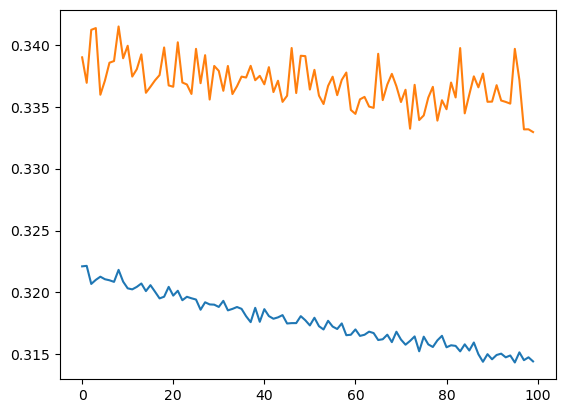

In [52]:
# here with ploting we chek the accuaray of the model 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

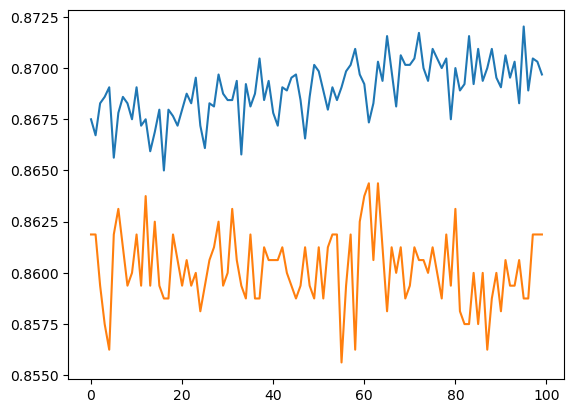

In [53]:
# here with ploting we chek the accuaray of the model 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])